# Broadband Customer Base Churn Classification

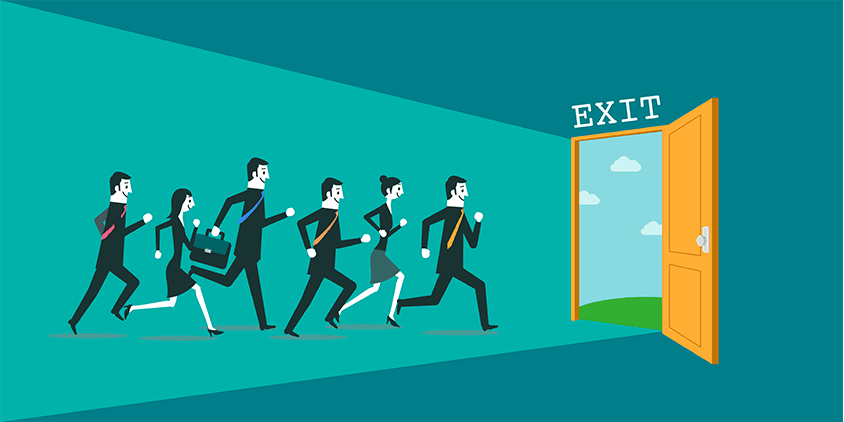

Companies that offer broadband internet operate in a very competitive market all over the world. It is laboriously difficult to examine and comprehend the factors that led a customer to choose to change insurance providers when millions of customers' various types of data have been collected.

> Churn rate is the number of losing customers or canceling members or subscribers. The extent to which a company manages to retain customers is an indication of customer satisfaction (or dissatisfaction). Churn rates are usually expressed in an absolute number or percentage of subscribers dropping out per month or per year.

Broadband internet provider firms rely on data to analyze customer behavior to prevent retention in a sector where client acquisition and retention are equally vital and the former is a more expensive procedure. One of the main issues facing the internet sector is churn. Knowing in advance whether a customer might switch provides broadband internet provider companies the chance to develop methods to stop it from really happening. Therefore, using machine learning to develop proactive marketing efforts that target clients who are about to lose is a good idea.

### Research questions

The aim of the study is to answer the below research questions:

- What are the main reasons that explains customer churn happens? 
- How does the retention rate evolve in time? 
- How much time does a custumer wait before churning? 
- Does contracts influence churn? 
- How is the churn rate affected by the monthly revenue of customers? 
- Does the bandwith of a customer affect churn?


### About the dataset

This is a data set of broadband service provider. It represents monthly bills of each customer with their Id, contract tenure, churned or not at yet etc.



### Features

The various features of the dataset are explained below:

1. *image*: The billing month and year
2. *newacct_no*: A unique customer id
3. *line_stat*: Ignorable columns (Use them in case you find a corelation, but mostly they can be ignored)
4. *bill_cycl*: Ignorable columns
5. *serv_type*: Ignorable columns
6. *serv_code*: Ignorable columns
7. *tenure*: Number of months since the customer is in the system 
8. *effc_strt_date*: Contract start date
9. *effc_end_date*: Contract end date
10. *contract_month*: Contract type
11. *ce_expiry*: Contract expiry date, if expiry date is jan'19, and today is jan'2020, then ce_expiry is -12, if expiry date is jan'21, and today is.
12. *secured_revenue*: Monthly revenue
13. *bandwidth*: Internet bandwidth
14. *term_reas_code*: Contract termination reason code
15. *term_reas_desc*: Description of contract termination reason code
16. *complaint_cnt*: Number of complaint calls done by customer every month
17. *with_phone_service*: Whether broadband customer has taken a phone service seaprately or not.
18. *churn*: churned or not
19. *current_mth_churn*: The month where the customer is churned, let say customer got churned in june'19, and we have data from jan'19 to jan'20

### Aim of the classification

Predict whether or not customers might churn during december 2019 using datas from 2018 and 2019.

---

## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import cross_validate

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report,confusion_matrix, ConfusionMatrixDisplay

from sklearn.feature_selection import mutual_info_regression

from statistics import mean

sns.set_style("whitegrid")

Install: seaborn, sklearn

---

## Exploratory Data Analysis

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/julienjta/Data-Science-Portfolio/main/Project%202/data/dataset.csv",low_memory=False)
print("There are {} observations for {} predictors.".format(df.shape[0],df.shape[1]))
df.head()

There are 510125 observations for 20 predictors.


image              newacct_no line_stat  bill_cycl serv_type    serv_code  \
0  201801  70068143.001.000000062        AC          1       BBS     VS100DUN   
1  201801  70068143.003.000072630        AC          1       BBS     VS030F6R   
2  201801  70071840.001.000000066        AC          1       BBS  EAXMXMFSRN1   
3  201801  70071840.003.000060034        AC          1       BBS     VS100DUN   
4  201801  70076500.001.000000073        AC          1       BBS     PF100FSR   

   tenure       effc_strt_date        effc_end_date  contract_month  \
0     202  06.03.2018 00:00:00  05.03.2021 00:00:00            36.0   
1      35  01.03.2019 00:00:00  28.02.2021 00:00:00            24.0   
2     202  01.10.2019 00:00:00  30.09.2021 00:00:00            24.0   
3      72  07.11.2018 00:00:00  06.11.2020 00:00:00            24.0   
4     202  01.05.2017 00:00:00  30.04.2019 00:00:00            24.0   

   ce_expiry  secured_revenue    bandwidth term_reas_code term_reas_desc  \
0       13.0            178.0         100M            NaN            NaN   
1       13.0           1572.0          30M            NaN            NaN   
2       20.0            290.0          10M            NaN            NaN   
3        9.0            218.0         100M            NaN            NaN   
4       -9.0            430.0  100M (FTTO)            NaN            NaN   

  complaint_cnt with_phone_service churn current_mth_churn Unnamed: 19  
0             0                  N     N                 N         NaN  
1             0                  N     N                 N         NaN  
2             0                  Y     N                 N         NaN  
3             0                  Y     N                 N         NaN  
4             0                  N     Y                 N         NaN

In [3]:
df.isnull().sum()

image                      0
newacct_no                 0
line_stat                  0
bill_cycl                  0
serv_type                  0
serv_code                  0
tenure                     0
effc_strt_date          1937
effc_end_date           1937
contract_month          1937
ce_expiry               1937
secured_revenue            0
bandwidth                  0
term_reas_code        504602
term_reas_desc        504602
complaint_cnt              0
with_phone_service         0
churn                      0
current_mth_churn          0
Unnamed: 19           510123
dtype: int64

With the informations of the different columns and a quick analysis, some columns don't bring any informations and thus can be deleted.

In [4]:
print(df.bill_cycl.unique())
print(df.serv_type.unique())
print(df["Unnamed: 19"].unique())

[1]
['BBS']
[nan 'Y']


Since the three columns "bill_cycl", "serv_type" and "Unnamed: 19" don't bring any informations, I will delete them. The column "term_reas_desc" is redundant because it only describes the reason code, it can also be deleted.

In [5]:
df = df.drop(["bill_cycl","serv_type","serv_code","Unnamed: 19","term_reas_desc","line_stat"],axis=1)

In [6]:
df.describe(include='all').T

count unique                     top    freq  \
image               510125.0    NaN                     NaN     NaN   
newacct_no            510125  27605  92115567.001.000066200      24   
tenure              510125.0    NaN                     NaN     NaN   
effc_strt_date        508188   2085     01.08.2018 00:00:00    4185   
effc_end_date         508188   2348     31.07.2020 00:00:00    4325   
contract_month      508188.0    NaN                     NaN     NaN   
ce_expiry           508188.0    NaN                     NaN     NaN   
secured_revenue     510125.0    NaN                     NaN     NaN   
bandwidth             510125      9                    100M  256952   
term_reas_code          5523     26                    CUCO    1969   
complaint_cnt         510125      9                       0  498081   
with_phone_service    510125      3                       N  309580   
churn                 510125      2                       N  441526   
current_mth_churn     510125      2                       N  504622   

                             mean          std       min       25%       50%  \
image               201857.993237    50.076142  201801.0  201807.0  201901.0   
newacct_no                    NaN          NaN       NaN       NaN       NaN   
tenure                  60.700254    51.213282       0.0      18.0      45.0   
effc_strt_date                NaN          NaN       NaN       NaN       NaN   
effc_end_date                 NaN          NaN       NaN       NaN       NaN   
contract_month          24.916928     5.245176       0.0      24.0      24.0   
ce_expiry                7.390413    13.719428    -175.0       2.0       9.0   
secured_revenue        504.573587  1492.281865   -385.22     158.0     204.0   
bandwidth                     NaN          NaN       NaN       NaN       NaN   
term_reas_code                NaN          NaN       NaN       NaN       NaN   
complaint_cnt                 NaN          NaN       NaN       NaN       NaN   
with_phone_service            NaN          NaN       NaN       NaN       NaN   
churn                         NaN          NaN       NaN       NaN       NaN   
current_mth_churn             NaN          NaN       NaN       NaN       NaN   

                         75%       max  
image               201907.0  201912.0  
newacct_no               NaN       NaN  
tenure                  95.0     225.0  
effc_strt_date           NaN       NaN  
effc_end_date            NaN       NaN  
contract_month          24.0     120.0  
ce_expiry               16.0     115.0  
secured_revenue        360.0  61161.29  
bandwidth                NaN       NaN  
term_reas_code           NaN       NaN  
complaint_cnt            NaN       NaN  
with_phone_service       NaN       NaN  
churn                    NaN       NaN  
current_mth_churn        NaN       NaN

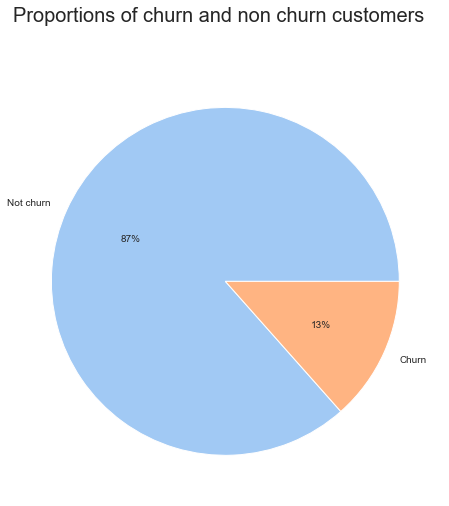

In [7]:
plt.figure(figsize = (8,8)).suptitle('Proportions of churn and non churn customers', fontsize=20)
labels = ['Not churn', 'Churn']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(df.churn.value_counts().values, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

---

### What are the main reasons that explains customer churn happens?

It‚Äôs important to understand why customers leave in the first place. Let's study the main reasons customers churn.

Explanation of the different termination reason codes:
- *REV*: Relocate to non-coverage(w/prof)
- *CLB*: Closing Business
- *NET*: Network Problem
- *UFSS*: Unsatisfy Field Service Support
- *CUCO*: Downsizing / Cut cost
- *EXP*: Sales Plan Not Attractive
- *NU*: No Use
- *OT*: Overdue Termination: Involuntary termination
- *COVL3*: Coverage Issue: Low speed coverage 
- *COM15*: COM-Unsatisfy Service quality
- *COVL2*: Coverage Issue: Low speed coverage 
- *OTHS*: Others
- *BILP*: Billing Problem
- *UCSH*: Unsatisfy CS Hotline
- *LOSF*: Lack of Service Features
- *EXI*: Additional extra installation charge
- *PLR*: Parallel Run Order
- *COVL1*: Coverage Issue: Low speed coverage
- *COM10*: COM-Miss follow-Help Desk
- *CUSN2*: Customer Issue: No use
- *UEMS*: Unsatisfy Email Service
- *CUSB0*: Customer Issue: Bankruptcy
- *MGR*: Migration Order
- *TRM*: Termination
- *NCAP*: No capacity
- *NWQU*: Network quality

<AxesSubplot:xlabel='count', ylabel='term_reas_code'>

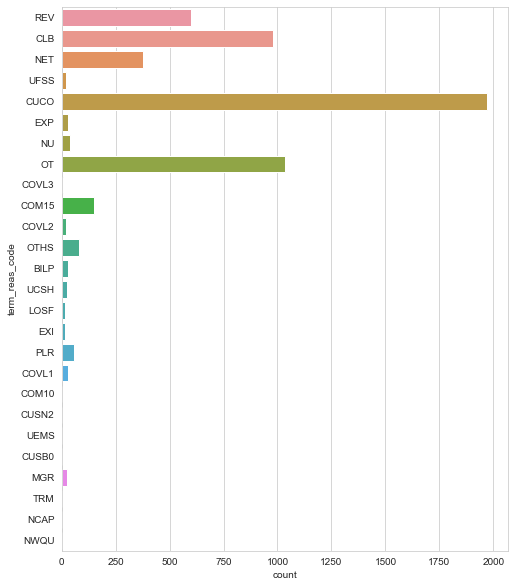

In [8]:
plt.figure(figsize = (8,10))
sns.countplot(y=df.term_reas_code)

In [9]:
tot_churn = len(df.loc[df.churn=='Y'])
tot_churn_with_reason = len(df.loc[(df.churn=='Y') & (df.term_reas_code.isnull() != False)])
percentage_reasons = tot_churn_with_reason/tot_churn
print("Only {}% of the reasons are given in the dataset. But it's enough to have a global view of the reasons that push customer to churn.".format(round(percentage_reasons*100)))

Only 92% of the reasons are given in the dataset. But it's enough to have a global view of the reasons that push customer to churn.


> üìå From that plot, we can see five main reasons that explains the churn: "Downsizing / Cut cost", "Overdue Termination: Involuntary termination", "Closing Business", "Relocate to non-coverage(w/prof)" and "Network Problem".

> ‚ö†Ô∏è To prevent Data Leakage, this column will also be deleted since we won't have access to it when trying to predict churn. The column "current_mth_churn" won't be accessible either.

---

In [10]:
df = df.drop(["term_reas_code","current_mth_churn"],axis=1)

### How does the retention rate evolve in time?
To retrieve the time information, we can use the variable image that gives information on the billing date.

In [11]:
df["year_billing"] = df["image"].astype(str).str[:4].astype(int)
df["month_billing"] = df["image"].astype(str).str[4:].astype(int)
df = df.drop("image",axis=1)

Now we will study the retention rate. For that, I will follow the first customers and compare each month the percentage remaining.

In [12]:
first_customers = df.loc[(df.year_billing==2018)&(df.month_billing==1)&(df.churn=='N')]
first_customers = first_customers.newacct_no.unique()
nb_first_customers = len(first_customers)
df_first_customers = df.loc[df.newacct_no.isin(first_customers)]

In [13]:
churn_rate_evolution = [(str(month)+'-'+str(year), len(df_first_customers.loc[(df_first_customers.year_billing==year)&(df_first_customers.month_billing==month)&(df_first_customers.churn=='N')])/nb_first_customers*100) for year in range(2018,2020) for month in range(1,13)]
churn_rate_evolution = pd.DataFrame(churn_rate_evolution, columns =['Date', 'Retention'])
churn_rate_evolution["Date"] = pd.to_datetime(churn_rate_evolution["Date"])

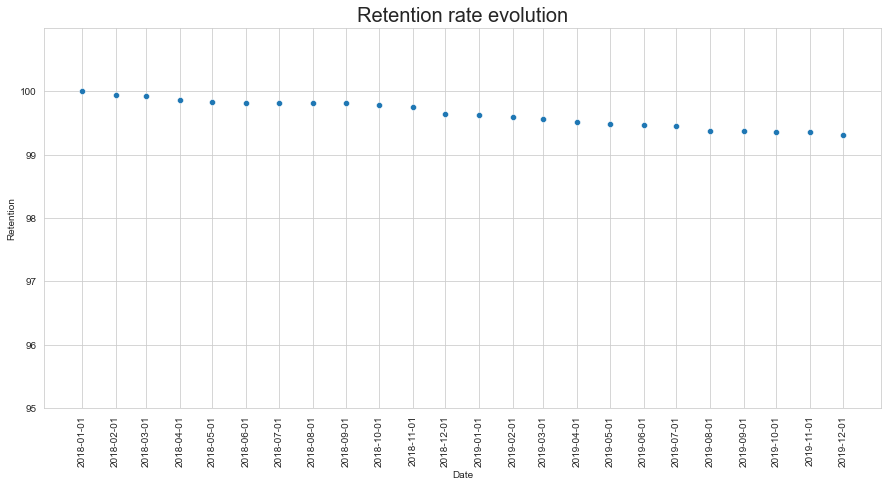

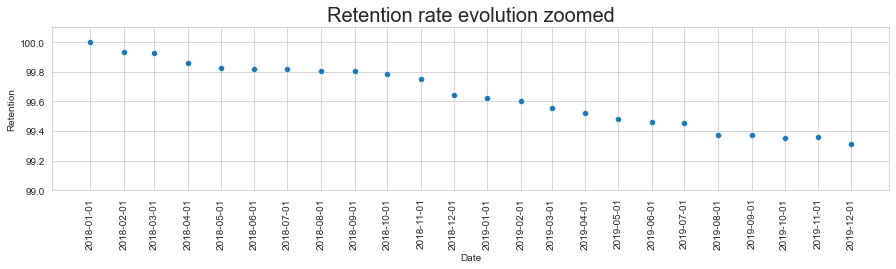

In [14]:
fig, axes = plt.subplots(figsize=(15,7))
sns.scatterplot(x="Date",y="Retention",data=churn_rate_evolution).set_title('Retention rate evolution', fontsize=20)
plt.xticks(churn_rate_evolution["Date"],rotation = 'vertical')
plt.yticks([95,96,97,98,99,100])
plt.ylim(95,101)
fig, axes = plt.subplots(figsize=(15,3))
sns.scatterplot(x="Date",y="Retention",data=churn_rate_evolution).set_title('Retention rate evolution zoomed', fontsize=20)
plt.xticks(churn_rate_evolution["Date"],rotation = 'vertical')
plt.ylim(99,100.1)
plt.show()

> üìå The retention rate seems to decrease quite slowly and lineary. In two years the company has only lost 0.7% of the first customers.

---

### How much time does a custumer wait before churning?

We can visualize the repartition of tenure values for churn and non churn.

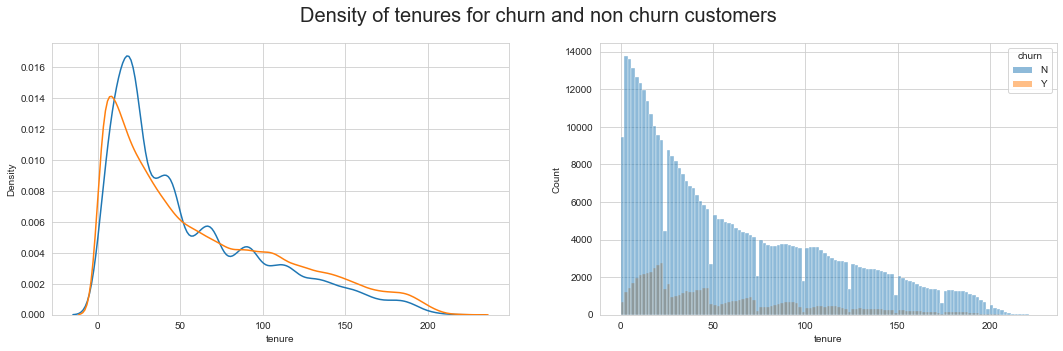

In [15]:
plt.figure(figsize = (18,5)).suptitle('Density of tenures for churn and non churn customers', fontsize=20)
plt.subplot(1,2,1)
sns.kdeplot(df[df.churn == 'Y'].tenure,label='Churn')
sns.kdeplot(df[df.churn == 'N'].tenure,label='Not Churn')
plt.subplot(1,2,2)
sns.histplot(x=df.tenure,hue=df.churn)
plt.show()

> üìå We can see here that the tenures repartion is quite similar  for both churn and not, just with different volumes .

---

### Does contracts influence churn?

In [16]:
freq_contracts = pd.DataFrame((df.loc[df.churn=='Y'].contract_month.value_counts()/len(df.loc[df.churn=='Y'])))
freq_contracts.head(3)

contract_month
24.0        0.848365
12.0        0.040992
36.0        0.029213

In [17]:
freq_contracts = pd.DataFrame((df.loc[df.churn=='N'].contract_month.value_counts()/len(df.loc[df.churn=='N'])))
freq_contracts.head(3)

contract_month
24.0        0.836066
36.0        0.051338
12.0        0.020583

> üìå Its clear that the most common contract is 24 months, but it seems that a longer contract like 36 months, may generate more churns than a smaller 12 months one.

---

### How is the churn rate affected by the monthly revenue of customers?

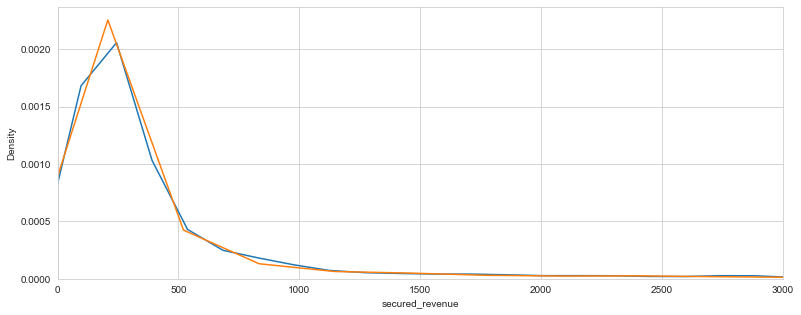

In [18]:
plt.figure(figsize = (13,5))

sns.kdeplot(df[df.churn == 'Y'].secured_revenue,label='Churn')
sns.kdeplot(df[df.churn == 'N'].secured_revenue,label='Not Churn')
plt.xlim(0,3000)
plt.show()

> üìå We can see here that the revenue repartion is quite similar for both churn and not, just with different volumes.

---

### Does the bandwidth of a customer affect churn?

In [19]:
def bandwidth_encoder(bandwidth):
    if bandwidth in ('30M', '10M','BELOW 10M', '50M'):
        return 0
    if bandwidth in ('100M','100M (FTTO)'):
        return 1
    if bandwidth in ('300M (FTTO)', '1000M (FTTO)', '500M (FTTO)'):
        return 2

df['bandwidth'] = df.bandwidth.map(bandwidth_encoder)
df['bandwidth'] = df.bandwidth.astype('int32')

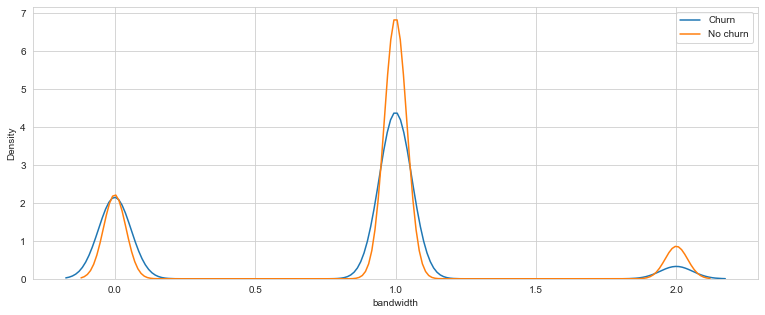

In [20]:
plt.figure(figsize = (13,5))

sns.kdeplot(x=df[df.churn == 'Y'].bandwidth,label='Churn')
sns.kdeplot(x=df[df.churn == 'N'].bandwidth,label='No churn')
plt.legend()
plt.show()

>üìå It seems that the better the bandwidth is the biggest is the difference bewteen customers who churn and don't. A better client bandwidth permits a better experience and keep that client.

---

### What variables influence most the churn?

In [21]:
df.with_phone_service = df.with_phone_service.replace({
    "N":0,
    "0":0,
    "Y":1,
    }).astype(int)

In [22]:
df.complaint_cnt = df.complaint_cnt.replace({
    " customer/ user pass away":0,
    }).astype(int)

In [23]:
df.churn = df.churn.replace({
    "N":0,
    "Y":1,
    }).astype(int)

In [24]:
df.effc_strt_date = pd.to_datetime(df.effc_strt_date)
df["start_month"] = df.effc_strt_date.dt.month
df["start_year"] = df.effc_strt_date.dt.year

df.effc_end_date = pd.to_datetime(df.effc_strt_date)
df["end_month"] = df.effc_end_date.dt.month
df["start_year"] = df.effc_end_date.dt.year

df = df.drop(["effc_strt_date","effc_end_date"],axis=1)

<AxesSubplot:>

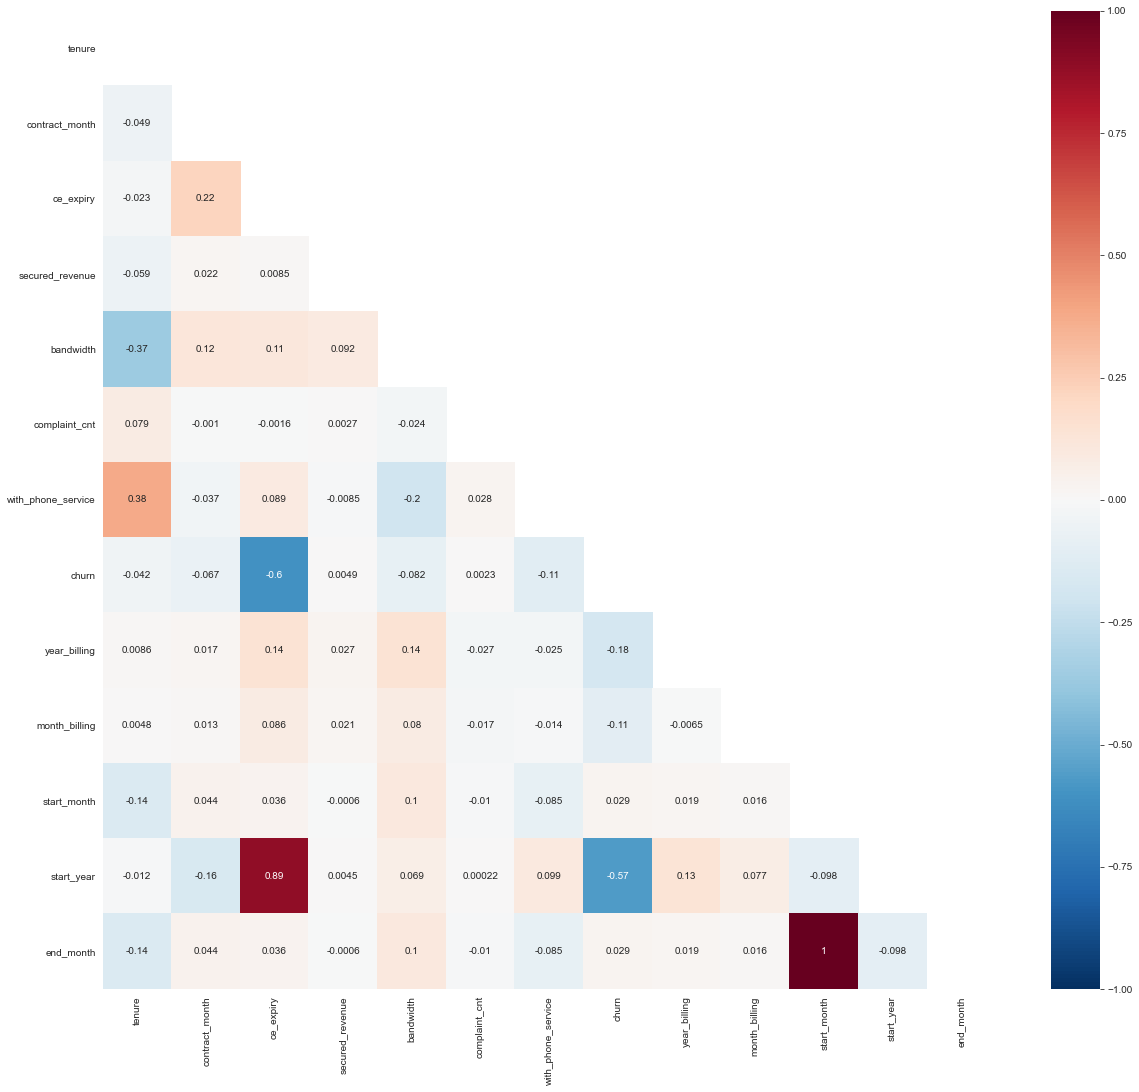

In [25]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

plt.figure(figsize = (20,18))
sns.heatmap(df.corr(), mask=mask, data = df,annot = True, vmin= -1.0, vmax= 1.0, center = 0, cmap = 'RdBu_r')

In [26]:
def make_mi_scores(X, y):
    X = X.copy().fillna(0)
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()

    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [27]:
X = df.copy()
y = X.pop("churn")

mi_scores = make_mi_scores(X, y)

In [28]:
print(mi_scores.sort_values(ascending=False))

newacct_no            0.502515
ce_expiry             0.339889
start_year            0.231511
secured_revenue       0.026757
year_billing          0.021112
with_phone_service    0.010912
bandwidth             0.006481
contract_month        0.006125
month_billing         0.005855
tenure                0.005678
complaint_cnt         0.005555
start_month           0.002013
end_month             0.001386
Name: MI Scores, dtype: float64


> üìå It looks like that the contract expiry date and the start year are the most linear linked to the churn of a customer.

---

## Predict customers's churn

In this part, I will try to find the best model to predict the churn of a customer with the given dataset.
For that I will split the data with a training set that goes from January 2018 to November 2019 and try to predict if those customer could potentially churn during December 2019.

### Load the data

In [29]:
def preprocessing(X):
    def bandwidth_encoder(bandwidth):
        if bandwidth in ('30M', '10M','BELOW 10M', '50M'):
            return 0
        if bandwidth in ('100M','100M (FTTO)'):
            return 1
        if bandwidth in ('300M (FTTO)', '1000M (FTTO)', '500M (FTTO)'):
            return 2
        
    def clean(X_):
        X = X_.copy()
        X['bandwidth'] = X['bandwidth'].map(bandwidth_encoder)
        X['bandwidth'] = X['bandwidth'].astype('int32')
        
        X["with_phone_service"] = X["with_phone_service"].replace({
            "N":0,
            "0":0,
            "Y":1,
        }).astype(int)
        
        X["complaint_cnt"] = X["complaint_cnt"].replace({" customer/ user pass away":0}).astype(int)
        
        X["year_billing"] = X["image"].astype(str).str[:4].astype(int)
        X["month_billing"] = X["image"].astype(str).str[4:].astype(int)
        
        X["effc_strt_date"] = pd.to_datetime(X["effc_strt_date"])
        X["start_month"] = X["effc_strt_date"].dt.month
        X["start_year"] = X["effc_strt_date"].dt.year

        X["effc_end_date"] = pd.to_datetime(X["effc_end_date"])
        X["end_month"] = X["effc_end_date"].dt.month
        X["start_year"] = X["effc_end_date"].dt.year

        X = X.drop(["effc_strt_date","effc_end_date","image","newacct_no","term_reas_code","current_mth_churn","bill_cycl","serv_type","serv_code","Unnamed: 19","term_reas_desc","line_stat"],axis=1)
        
        return X
    
    return clean(X)

In [30]:
def load_data():
    # Read data
    df = pd.read_csv("https://raw.githubusercontent.com/julienjta/Data-Science-Portfolio/main/Project%202/data/dataset.csv",low_memory=False)
    
    df.churn = df.churn.replace({
                "N":0,
                "Y":1,
            }).astype(int)
    
    X = df.copy()
    y = X.pop("churn")
    
    xtrain = X.loc[X.image<201912]
    ytrain = y.loc[xtrain.index]
    xtest = X.loc[X.image>=201912]
    ytest = y.loc[xtest.index]
    
    # Since there are not a lot of NaN values, we can drop the rows in the train data. 
    # For test we can perform imputation.
    
    xtrain = xtrain.dropna(subset=['effc_strt_date'])
    ytrain = ytrain.loc[xtrain.index]
    
    xtrain = preprocessing(xtrain)
    xtest = preprocessing(xtest)
    
    return xtrain,xtest,ytrain,ytest

In [31]:
xtrain,xtest,ytrain,ytest = load_data()

---

### Define the best model

In [32]:
models = {}
models["Logistic Regression"]={"model":LogisticRegression(random_state=1,max_iter=1000)}
models["Random Forest"]={"model":RandomForestClassifier(random_state=1)}
models["Gradient Boosting Classifier"]={"model":GradientBoostingClassifier(random_state=1)}
models["Ada Boost Classifier"]={"model":AdaBoostClassifier(random_state=1)}
models["Gaussian Naive Bayesian"]={"model":GaussianNB()}
models["Decision Tree Classifier"]={"model":DecisionTreeClassifier(random_state=1)}
# models["SVC"]={"model":SVC(random_state=1)} SVC won't be used because of the big size of the dataset

To determine the best model, I want to use cross-validation for time series, moving the window of the studied period in time. However, since time is given per month, and that we want a full month to be the validation, I decided to create a function specially for cross validation with this dataset.

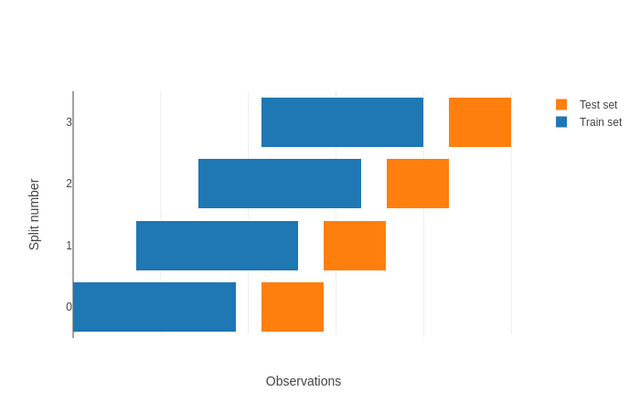

In [33]:
def cross_validate_dates(model,xtrain,ytrain,nb_splits = 5):
    list_months = []

    scores_accuracy = []
    scores_precision  = []
    scores_recall = []
    scores_f1 = []

    for year in xtrain.year_billing.unique():
        for month in xtrain.month_billing.unique():
            list_months.append((year,month))

    list_months.pop()
    size_split = len(list_months)-nb_splits

    xtrain_split = pd.DataFrame()
    for i in range(3):
        count=0
        for month in list_months[i:]:
            xtrain_split = pd.concat([xtrain_split,xtrain.loc[(xtrain.year_billing==month[0])&(xtrain.month_billing==month[1])]])
            count+=1
            if count>=size_split:
                ytrain_split = ytrain.loc[xtrain_split.index]
                xtest_split_month = list_months[size_split+i]
                xtest_split = xtrain.loc[(xtrain.year_billing==xtest_split_month[0])&(xtrain.month_billing==xtest_split_month[1])]
                ytest_split = ytrain.loc[xtest_split.index]
                break
        model.fit(xtrain_split,ytrain_split)
        ypred_split = model.predict(xtest_split)
        scores_accuracy.append(accuracy_score(ytest_split,ypred_split))
        scores_precision.append(precision_score(ytest_split,ypred_split))
        scores_recall.append(recall_score(ytest_split,ypred_split))
        scores_f1.append(f1_score(ytest_split,ypred_split))

    return {'test_accuracy':mean(scores_accuracy), 'test_precision':mean(scores_precision), 'test_recall':mean(scores_recall), 'test_f1':mean(scores_f1)}

In [34]:
def get_scores(models,xtrain,ytrain):
    scoring = ['precision', 'recall', 'f1', 'accuracy']
    #Performance evaluation
    def print_scores(name, scores):
        print("--- "+name+" ---")
        print("Accuracy: ",scores["test_accuracy"].mean())
        print("Precision: ",scores["test_precision"].mean())                         
        print("Recall: ",scores["test_recall"].mean())
        print("F1-Score: ",scores["test_f1"].mean()) 
        print("\n\n")
    
    for name,model in models.items():
        scores = cross_validate_dates(model["model"],xtrain,ytrain,nb_splits = 5)
        print_scores(name, scores)

The studied dataset has unequal proportions of churned and not churned customers. For that reason accuracy may not be a good metric to follow.

More generally, to target with marketing campains the potential churn customers, we want to make sure we **don't miss those churns**. But we also **don't want to spam customers** who did not intend to churn with useless marketing messages.

For both those reasons, the two metrics to take in consideration should be **the precision and the recall**. We can also **study the F1 score** to maintain a good balance between the precision and the recall.

In [35]:
get_scores(models,xtrain,ytrain)

--- Logistic Regression ---
Accuracy:  0.9460669955474726
Precision:  0.5650157908390299
Recall:  0.3385589183742505
F1-Score:  0.42332976155933355



--- Random Forest ---
Accuracy:  0.9982075922032884
Precision:  0.984276974474102
Recall:  0.9854591562064167
F1-Score:  0.9848673588240847



--- Gradient Boosting Classifier ---
Accuracy:  0.9849952843527499
Precision:  0.8068894911212997
Recall:  0.9769003272688336
F1-Score:  0.8836662537730913



--- Ada Boost Classifier ---
Accuracy:  0.9831881892463131
Precision:  0.797570406181272
Recall:  0.9546873007959269
F1-Score:  0.8688960738033565



--- Gaussian Naive Bayesian ---
Accuracy:  0.951820138579343
Precision:  0.6326888938948529
Recall:  0.4443901977610707
F1-Score:  0.5217039705388216



--- Decision Tree Classifier ---
Accuracy:  0.9971140689534146
Precision:  0.9797310252559136
Recall:  0.9712727869639889
F1-Score:  0.9754737737042158





It seems that best results are given by the **Random Forest Classifier** for the 4 scores. For that reason, it will be that model we will use later on the test dataset.

---

### Apply the model on the test dataset

Let's now compute the score for the test dataset.

In [36]:
def get_pipeline(model):
    imputer = SimpleImputer(strategy='most_frequent')
    scaler = MinMaxScaler()
    
    my_pipeline = Pipeline(steps=[('imputer', imputer),
                                  ('scaler',scaler),
                                  ('model', model)
                             ])
    
    return my_pipeline

In [37]:
pipeline = get_pipeline(RandomForestClassifier(random_state=1))
pipeline.fit(xtrain,ytrain)

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('scaler', MinMaxScaler()),
                ('model', RandomForestClassifier(random_state=1))])

And now the pipeline is **ready for production** and we can finally try it on our test dataset to see the final results.

Accuracy:  0.9978298218645447
Precision:  0.8608058608058609
Recall:  0.9591836734693877
F1 score:  0.9073359073359073


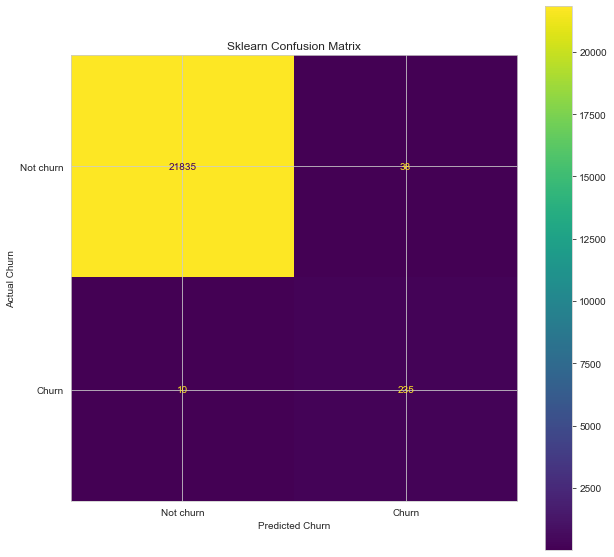

In [38]:
ypred = pipeline.predict(xtest)
print("Accuracy: ",accuracy_score(ytest,ypred))
print("Precision: ",precision_score(ytest,ypred))
print("Recall: ",recall_score(ytest,ypred))
print("F1 score: ",f1_score(ytest,ypred))

cm = confusion_matrix(ytest, ypred)
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['Not churn', 'Churn'])

fig, ax = plt.subplots(figsize=(10,10))
cmd_obj.plot(ax=ax)

cmd_obj.ax_.set(title='Sklearn Confusion Matrix', xlabel='Predicted Churn', ylabel='Actual Churn')
plt.show()

---

## Take away points

>**1.** The model that gives the best result is the Random Forest with on the test dataset an precision score equals to , a recall score equalt to and an F1 score equals to .
>
>**2.** It seems that the retention curve doesn't decrease that much. The company seem to manage to keep its customers quite well.
>
>**3.** The five main reasons that explains the churn: "Downsizing / Cut cost", "Overdue Termination: Involuntary termination", "Closing Business", "Relocate to non-coverage(w/prof)" and "Network Problem".
>
>**4.** It seems that a 36 months contract tend to be more churned than a 12 months contract.
>
>**5.** The better the bandwidth is, the less customers tend to churn.
>
>**6.** It looks like that the contract expiry date and the start year are the most linear linked to the churn of a customer.